In [37]:
from Bio.SearchIO import HmmerIO
from Bio import AlignIO, SeqIO
import re 

import pandas as pd
import subprocess

from glob import glob
import os

from tqdm.notebook import tqdm

import pandas as pd
from addict import Dict
from hmm_search_funcs_for_atpases import *

from matplotlib_venn import venn2

import matplotlib.pyplot as plt
import numpy as np

In [38]:
PATHES = pd.read_csv('../gtdb_info/pathes.csv')
pd.options.display.max_colwidth = 120
PATHES.head(1)

,path,accession,assembly,kindom,species
0,/media/pc208/es/litvinanna/gtdb-202/genomic_files_reps/protein_faa_reps/archaea/GB_GCA_000008085.1_protein.faa,GB_GCA_000008085.1,GCA_000008085.1,archaea,Nanoarchaeum equitans


In [3]:
seq_ids_data = pd.read_csv('../05_blast/genomic_PATHES.csv', index_col = 0)[['genome_id', 'seq_ids']]
seq_ids_data.seq_ids = seq_ids_data.seq_ids.apply(eval)
seq_ids_data = seq_ids_data.explode('seq_ids')
seq_ids_data = seq_ids_data.rename({'seq_ids': 'seq_id'}, axis = 1)

In [4]:
seq_ids_data.shape

(5939692, 2)

# [optional] run hmm

In [211]:
! ls hmms

A_V.fasta	       b_N.hmm		     delta_trimmed.fasta
B_V.fasta	       b_N_trimmed.fasta     epsilon.hmm
a.hmm		       b_trimmed.fasta	     epsilon_trimmed.fasta
a_v4_trimmed.fasta     beta.hmm		     gamma.hmm
ab_dist.aligned.fasta  beta_N.hmm	     gamma_trimmed.fasta
alpha.hmm	       beta_N_trimmed.fasta  hmms
alpha_N.hmm	       c.hmm		     mulk_v_type_ck.fasta
alpha_N_trimmed.fasta  c_v4_trimmed.fasta    mulk_v_type_ck.hmm
b.hmm		       delta.hmm


In [214]:
# ! hmmbuild hmms/B_V.hmm hmms/B_V.fasta

In [4]:
# for subunit in ['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'a', 'b', 'c', 'c_dom']:
#     print(f'{subunit:10}' , len(os.listdir(f'hmmsearch_results/{subunit}')))

In [5]:
# for subunit in ['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'a', 'b', 'c']:

#     for genome in glob('/media/pc208/es/litvinanna/gtdb-202/genomic_files_reps/protein_faa_reps/archaea/*'):
#         try:
#             run_hmmsearch(genome, subunit, 'hmmsearch_results')
#         except:
#             pass

In [6]:
# for subunit in ['c']:
#     for genome in glob('/media/pc208/es/litvinanna/gtdb-202/genomic_files_reps/protein_faa_reps/bacteria/*'):
#         try:
#             run_hmmsearch(genome, subunit, 'hmmsearch_results', mode = 'domtblout')
#         except:
#             pass

In [7]:
# ! hmmbuild hmms/b.hmm hmms/b_trimmed.fasta

In [ ]:
# for subunit in ['mulk_v_type_ck']:
#     for genome in glob('/media/pc208/es/litvinanna/gtdb-202/genomic_files_reps/protein_faa_reps/*/*'):
#         try:
#             run_hmmsearch(genome, subunit, 'hmmsearch_results', mode = 'domtblout')
#         except:
#             pass

In [48]:
# ! hmmbuild hmms/b_N.hmm hmms/b_N_trimmed.fasta 

In [ ]:
# for subunit in ['alpha_N', 'beta_N']:
#     for genome in glob('/media/pc208/es/litvinanna/gtdb-202/genomic_files_reps/protein_faa_reps/*/*'):
#         try:
#             run_hmmsearch(genome, subunit, 'hmmsearch_results', mode = 'tblout')
#         except:
#             pass

In [ ]:
# for subunit in ['A_V', 'B_V']:
#     for genome in glob('/media/pc208/es/litvinanna/gtdb-202/genomic_files_reps/protein_faa_reps/*/*'):
#         try:
#             run_hmmsearch(genome, subunit, 'hmmsearch_results', mode = 'tblout')
#         except:
#             pass

# read results

In [235]:
def parse_hmmresults(path):
    '''parse hmm search results in multiple files in directory 'path' 
    (path contains *)
    returns dataframe'''
    full_data = Dict()
    for path1 in tqdm(glob(path), ncols = 100):
        name = path1.split('/')[-1] #genome name
        r = HmmerIO.hmmer3_tab.Hmmer3TabParser(open(path1, 'r'))
        for i in r:
            for j in i.hits:
                data = parse_description(j.description)
                data['fasta_id'] = j.id
                data['bitscore'] = j.bitscore
                data['evalue'] = j.evalue
                data['genome'] = name
                full_data[(name, j.id)] = data              
    df = pd.DataFrame(full_data).T
    return df

In [236]:
# for subunit in [
#     'alpha', 
#     'beta', 'gamma', 'delta', 'epsilon', 'a', 'b', 'c']:
#     df = parse_hmmresults(f'hmmsearch_results/{subunit}/*')
#     df.to_csv(f'hmmsearch_results/{subunit}.csv', index = None)



In [216]:
# for subunit in ['alpha_N', 'beta_N', 'b_N']:
#     df = parse_hmmresults(f'hmmsearch_results/{subunit}/*')
#     df.to_csv(f'hmmsearch_results/{subunit}.csv', index = None)

In [217]:
for subunit in  ['A_V', 'B_V']:
    df = parse_hmmresults(f'hmmsearch_results/{subunit}/*')
    df.to_csv(f'hmmsearch_results/{subunit}.csv', index = None)

100%|███████████████████████████████████████████████████████| 47894/47894 [00:12<00:00, 3806.93it/s]


# N

In [165]:
dfs = Dict()
for subunit in [
    'alpha', 'beta', 'alpha_N', 'beta_N', 'b', 'b_N']:
    dfs[subunit] = pd.read_csv(f'hmmsearch_results/{subunit}.csv')
    print(f'{subunit:10}', dfs[subunit].shape[0])

alpha      180779
beta       203092
alpha_N    178947
beta_N     193193
b          237790
b_N        173818


In [166]:
# _, axs = plt.subplots(3, 2, figsize = (15, 5))
# subunits = ['alpha', 'beta','alpha_N', 'beta_N',  'b', 'b_N']
# for ax, subunit in zip(axs.flatten(),subunits):
#     ax.hist(dfs[subunit].bitscore, bins = 100)
#     ax.set_title(subunit)
#     mn = ax.get_xticks().min(); mx = ax.get_xticks().max()
#     ax.set_xticks(np.arange(round(mn, -1), round(mx, -1), round((mx-mn)/10, -1)))
#     plt.subplots_adjust(hspace=0.5)

In [167]:
final = pd.read_csv('genomes_info_F_enz_v3.csv')
print(final.shape)

(389246, 26)


In [215]:
alpha = dfs.alpha[['fasta_id', 'bitscore']].merge(
    dfs.alpha_N[['fasta_id', 'bitscore']], 
    on = 'fasta_id', 
    suffixes= ['_F', '_N'], how = 'outer')

beta = dfs.beta[['genome', 'fasta_id', 'bitscore']].merge(
    dfs.beta_N[['fasta_id', 'bitscore']], 
    on = 'fasta_id', 
    suffixes= ['_F', '_N'], how = 'outer')

b = dfs.b[['fasta_id', 'bitscore']].merge(
    dfs.b_N[['fasta_id', 'bitscore']], 
    on = 'fasta_id', 
    suffixes= ['_F', '_N'], how = 'outer')

alpha = alpha.merge(final[['fasta_id', 'enzFN']], how = 'left')
alpha.fillna(0, inplace = True)

beta = beta.merge(final[final.subunit == 'beta'][['genome', 'fasta_id', 'enzFN']], how = 'left')
beta.fillna(0, inplace = True)

beta.enzFN.value_counts()

0    170015
F     39005
N      1551
Name: enzFN, dtype: int64

In [216]:
# from matplotlib_venn import venn2
# venn2([set(dfs.alpha  [dfs.alpha  .bitscore > 260].fasta_id), 
#        set(dfs.alpha_N[dfs.alpha_N.bitscore > 260].fasta_id)])

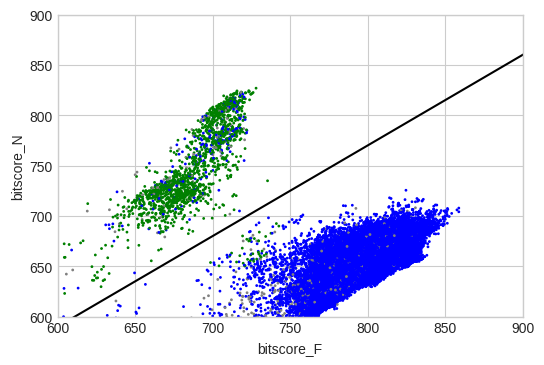

In [217]:
df = beta
df.plot.scatter('bitscore_F','bitscore_N', s = 1, alpha = 1, 
                   color = df.enzFN.map({'N':'green', 'F':'blue', 0:'grey'}).to_list())
# plt.hlines(270, 0, 1000, color = 'black')
# plt.vlines(270, 0, 1000,color = 'black')
plt.xlim(600, 900);plt.ylim(600, 900)
plt.plot([0, 1000], [50, 950],'k-', ) # y = 50 + 0.9x

In [80]:
# cols = [ 'bitscore','logevalue',  'subunit', 'strand', 'ID', 'N',
#         'operons', 'enz', 'opt', 'enzt', 'step', 'fasta_id', 'genome']
# pd.options.display.max_columns = 50
# final[final.seq_id == 'JAABTD010000067.1'][cols].sort_values('N')

In [1]:
# beta[(beta.bitscore_F*0.9 + 50 < beta.bitscore_N) & (beta.enzFN =='F') & (beta.bitscore_N > 600)]

In [173]:
for bt in beta[((beta.bitscore_F*0.9 + 50) < beta.bitscore_N) & (beta.enzFN =='F')].fasta_id:
    en = final[final.fasta_id == bt].enz.iloc[0]
    if pd.isna(en):
        continue
    ss = final[final.enz == en]
    if (not 'delta' in ss.subunit.to_list()) or (not 'b' in ss.subunit.to_list()):
        continue

    delta = ss[ss.subunit == 'delta'].fasta_id.iloc[0]
    b     = ss[ss.subunit == 'b'].fasta_id.iloc[0]
    
    if delta == b and len(ss.seq_id.unique()) == 1:
        if ss.N.max() - ss.N.min() <= 10:
            final.at[ss.index, 'enzFN'] = 'N'

In [176]:
for bt in beta[(beta.bitscore_F*0.9 + 50 < beta.bitscore_N) & (beta.enzFN =='F')\
               & (beta.bitscore_N > 600)].fasta_id:
    en = final[final.fasta_id == bt].enz.iloc[0]
    if pd.isna(en):
        continue
    ss = final[final.enz == en]
    if (not 'delta' in ss.subunit.to_list()) or (not 'b' in ss.subunit.to_list()):
        continue

    delta = ss[ss.subunit == 'delta'].fasta_id.iloc[0]
    b     = ss[ss.subunit == 'b'].fasta_id.iloc[0]
    if delta == b:
        final.at[ss.index, 'enzFN'] = 'N'

In [214]:
for bt in beta[(beta.bitscore_F*0.9 + 50 < beta.bitscore_N) & (beta.enzFN =='F')\
               & (beta.bitscore_N > 600)].fasta_id:
    en = final[final.fasta_id == bt].enz.iloc[0]
    if pd.isna(en):
        continue
    ss = final[final.enz == en].copy()
    ss.sort_values('N', inplace = True)
    if ss.seq_id.nunique() == 1:
        sss = tuple(ss.subunit.to_list())
        if sss in [
            ('beta', 'epsilon', 'c', 'alpha', 'gamma'),
            ('beta', 'epsilon', 'a', 'c', 'b', 'alpha'),
            ('beta', 'epsilon', 'a', 'c', 'b', 'alpha', 'gamma'),
            ('beta', 'epsilon', 'a', 'c', 'b'),
            ('gamma', 'alpha', 'b', 'c', 'a', 'epsilon', 'beta'),
            ('gamma', 'alpha', 'c', 'epsilon', 'beta'),
            ('gamma', 'alpha', 'b', 'c', 'a', 'beta'),
            ('gamma', 'alpha', 'delta', 'c', 'epsilon', 'beta')
        ]:
            final.at[ss.index, 'enzFN'] = 'N'
            final.at[ss.index, 'enzt']  = 'N'
        else:
            pass
#             print(sss) 
#             if sss == ():
#                 display(ss[cols])

#     delta = ss[ss.subunit == 'delta'].fasta_id.iloc[0]
#     b     = ss[ss.subunit == 'b'].fasta_id.iloc[0]
#     if delta == b:
#         final.at[ss.index, 'enzFN'] = 'N'

In [177]:
# final[final.genome == 'RS_GCF_000969905.1']

In [219]:
final.to_csv('genomes_info_F_enz_v4.csv', index=  False)

# Choose thresholds

In [39]:
dfs = Dict()
for subunit in [
    'alpha', 'beta', 'gamma', 'delta', 'epsilon', 'a', 'b']:
    dfs[subunit] = pd.read_csv(f'hmmsearch_results/{subunit}.csv')
    print(f'{subunit:10}', dfs[subunit].shape[0])

alpha      180779
beta       203092
gamma      46409
delta      62752
epsilon    55349
a          46268
b          237790


In [40]:
dfs['c'] = pd.read_csv('hmmsearch_results/c_dom_merged.csv')
dfs['c'].drop(['c_domains_old', 'intersection'], axis = 1, inplace = True)

In [41]:
dfs['c'].columns

Index(['genome', 'fasta_id', 'ID', 'start', 'end', 'strand', 'partial',
       'start_type', 'rbs_motif', 'rbs_spacer', 'gc_cont', 'bitscore',
       'bitscore_mean', 'c_domains'],
      dtype='object')

In [42]:
all_subunits = ['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'a', 'b', 'c']
# get sed_id from fasta_id
for subunit in tqdm(all_subunits):
    dfs[subunit]['seq_id'] = dfs[subunit].fasta_id.apply(lambda x : x[::-1].split('_', maxsplit = 1)[-1][::-1] )
#     dfs[subunit] = dfs[subunit].merge(seq_ids_data)
    dfs[subunit]['subunit'] = subunit
    dfs[subunit]['N'] = dfs[subunit].ID.apply(lambda x: int(x.split('_')[-1]))
#     df['genome_id'] = df.genome.apply(lambda x: x[3:])

100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 12.21it/s]


In [3]:
# import matplotlib
# matplotlib.style.use('seaborn-whitegrid')
# import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 100

# import numpy as np

# _, axs = plt.subplots(4, 2, figsize = (13, 10))
# subunits = ['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'a', 'b', 'c']
# for ax, subunit in zip(axs.flatten(),subunits):
#     ax.hist(dfs[subunit].bitscore, bins = 100)
#     ax.set_title(subunit)
#     mn = ax.get_xticks().min()
#     mx = ax.get_xticks().max()
#     ax.set_xticks(np.arange(round(mn, -1), round(mx, -1), round((mx-mn)/15, -1)))
#     plt.subplots_adjust(hspace=0.5)
    
# thr = [260, # alpha
#        260, # beta
#        50,  # gamma
#        15,  # delta
#        30,  # epsilon
#        30,  # a
#        15,  # b
#        40,  # c
#       ]

# for ax, th in zip(axs.flatten(), thr):
#     ax.vlines(th, 0, ax.get_ylim()[1], color = 'black')

In [44]:
# ab = dfs['alpha'][['fasta_id', 'bitscore']].merge(dfs['beta'][['fasta_id', 'bitscore']], on = 'fasta_id')

In [72]:
# plt.figure(figsize = (5, 5))
# plt.scatter(ab.bitscore_x, ab.bitscore_y, alpha = 0.1, s = 0.1)
# plt.hlines(260, 0, 1000, linewidth = 1)
# plt.vlines(260, 0, 1000, linewidth = 1)

# Operons

In [45]:
thr = [260, # alpha
       260, # beta
       50, # gamma
       15,  # delta
       30,  # epsilon
       30, # a
       15,  # b
       40,  # c
      ]
all_subunits = ['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'a', 'b', 'c']

In [46]:
dfsf = Dict()
for subunit, th in zip(all_subunits, thr):
    dfsf[subunit] = dfs[subunit][dfs[subunit].bitscore > th]

for k, v in dfsf.items():
    print(f'{k:10}', len(v))

alpha      42723
beta       42872
gamma      42933
delta      45393
epsilon    42731
a          43082
b          111277
c          43059


In [47]:
final = pd.concat([v for v in dfsf.values()])
final.shape

(414070, 18)

In [48]:
# tax = pd.read_csv('../gtdb_info/gtdb_taxonomy.csv')
# tax['genome_id'] = tax.accession.apply(lambda x: x[3:])
# tax.head(1)

# 'p__Bacteroidota' 'p__Actinobacteriota' 'p__Firmicutes' 'p__Proteobacteria'
# final = final[~final.genome.isin( tax[
#     (tax.p == 'p__Bacteroidota') | (tax.p ==  'p__Actinobacteriota') \
#     | (tax.p ==  'p__Firmicutes') | (tax.p ==  'p__Proteobacteria')
#     ].accession
# )].copy()
# final = final[final.genome == 'RS_GCF_000277795.1']
final.shape

(414070, 18)

In [49]:
final.reset_index(inplace = True)

In [50]:
def find_operon_write(df, i):
    for _, row in df.iterrows():
        strand = '+' if row.strand == 1 else '-'
        subprocess.run(
f"grep '{row.fasta_id},' gtdb_proteins_operons/{row.genome}/{row.seq_id}{strand} >> op_info/{i}", 
            shell = True)
    return 

In [52]:
# ! rm op_info/*

In [53]:
from joblib import delayed, Parallel
s = 1000
Parallel(n_jobs=10)(delayed(find_operon_write)(final.iloc[i*s:(i+1)*s], i) for i in range(416))
pass

grep: gtdb_proteins_operons/GB_GCA_902787255.1/CADAFY010000197.1+: No such file or directory
grep: gtdb_proteins_operons/GB_GCA_902787255.1/CADAFY010000015.1+: No such file or directory


In [54]:
names = ['start', 'end', 'strand', 'ID', 'partial', 'start_type', 'rbs_motif',
           'rbs_spacer', 'gc_cont', 'fasta_id', 'genome',
           'seq_id',  'operons', 'N']

op_for_final = pd.concat([pd.read_csv(f'op_info/{i}', names = names) for i in range(415)])
op_for_final.shape, op_for_final.drop_duplicates().shape

((414066, 14), (410631, 14))

In [55]:
# final.drop('operons', axis = 1, inplace = True)

In [4]:
# venn2([set(final.fasta_id), set(op_for_final.fasta_id)])

In [5]:
# set(final.fasta_id) - set(op_for_final.fasta_id)

In [61]:
# seq_ids_data[seq_ids_data.seq_id == 'CADAFY010000015.1']

In [62]:
final.merge(op_for_final[['fasta_id', 'operons']]).shape

(421064, 20)

In [63]:
final = final.merge(op_for_final[['fasta_id', 'operons']], how = 'left')
final.shape

(421068, 20)

In [64]:
final = final.drop_duplicates()
final.shape

(414070, 20)

In [67]:
# final[final.seq_id == 'AE009951.2']

In [68]:
final.to_csv('atp_subunits_operons.csv', index = False)

In [98]:
# final.groupby('fasta_id').apply(lambda df : tuple(df.subunit.to_list()) if len(df) > 1 else None)\
#     .value_counts()

In [ ]:
['start', 'end', 'strand', 'ID', 'partial', 'start_type', 'rbs_motif',
       'rbs_spacer', 'gc_cont', 'fasta_id', 'genome']

In [72]:
len(glob('gtdb_proteins_operons/*/*'))

1861982

In [70]:
len(glob('gtdb_proteins_operons/*'))

16647

In [2]:
import pandas as pd
seq_ids_data = pd.read_csv('../05_blast/genomic_PATHES.csv', index_col = 0)[['genome_id', 'seq_ids']]
seq_ids_data.seq_ids = seq_ids_data.seq_ids.apply(eval)
seq_ids_data = seq_ids_data.explode('seq_ids')
seq_ids_data = seq_ids_data.rename({'seq_ids': 'seq_id'}, axis = 1)

In [27]:
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 100

In [7]:
c = seq_ids_data.genome_id.value_counts()

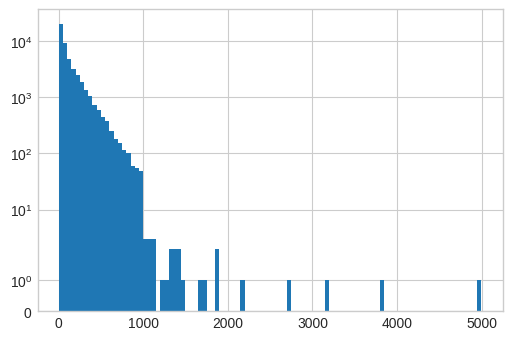

In [28]:
c.hist(bins = 100)
plt.yscale('symlog')